In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 


In [2]:
#Read csv
fulldata = pd.read_csv("fulldata.csv")
fulldata.head()

,Unnamed: 0,Institution Name,City,State,Zip Code,zip,Type,Latitude,Longitude,Number of Undergraduate Students,...,Average Cost for Program Year Institution,Tuition Fee for In-District Students,Tuition Fee for Out-of-State Students,Admission Rate,county,Median Income,Total Count,Below Poverty,Above Poverty,Poverty Rate
0,0,Abilene Christian University,Abilene,TX,79699,79699,2,32.468943,-99.709797,3141.0,...,NaN,40500.0,40500.0,0.6579,Taylor,61806,136790,19947,116843,14.582206
1,1,Alvin Community College,Alvin,TX,77511-4898,77511,1,29.396244,-95.240671,3151.0,...,NaN,1706.0,4010.0,NaN,Brazoria,91972,362047,27271,334776,7.532447
2,2,Amarillo College,Amarillo,TX,79109,79109,1,35.187839,-101.846988,7271.0,...,NaN,2136.0,4704.0,NaN,Randall,78038,138573,13072,125501,9.433295
3,3,Amberton University,Garland,TX,75041-5595,75041,2,32.859931,-96.653020,114.0,...,NaN,NaN,NaN,NaN,Dallas,70732,2573799,359882,2213917,13.982522
4,4,Angelina College,Lufkin,TX,75902-1768,75902,1,31.287444,-94.731625,2453.0,...,NaN,3120.0,6150.0,NaN,Angelina,57055,84075,13536,70539,16.099911


In [5]:
renamed = fulldata.copy()
renamed["Type"] = renamed["Type"].astype(str)
renamed.dtypes

Unnamed: 0                                      int64
Institution Name                               object
City                                           object
State                                          object
Zip Code                                       object
zip                                             int64
Type                                           object
Latitude                                      float64
Longitude                                     float64
Number of Undergraduate Students              float64
Average Cost for Academic Year Institution    float64
Average Cost for Program Year Institution     float64
Tuition Fee for In-District Students          float64
Tuition Fee for Out-of-State Students         float64
Admission Rate                                float64
county                                         object
Median Income                                   int64
Total Count                                     int64
Below Poverty               

In [7]:
renamed["Type"]=renamed["Type"].str.replace("1","Public")
renamed["Type"]=renamed["Type"].str.replace("2","Private for Profit")
renamed["Type"]=renamed["Type"].str.replace("3","Private Non-Profit")
renamed.head()

,Unnamed: 0,Institution Name,City,State,Zip Code,zip,Type,Latitude,Longitude,Number of Undergraduate Students,...,Average Cost for Program Year Institution,Tuition Fee for In-District Students,Tuition Fee for Out-of-State Students,Admission Rate,county,Median Income,Total Count,Below Poverty,Above Poverty,Poverty Rate
0,0,Abilene Christian University,Abilene,TX,79699,79699,Private for Profit,32.468943,-99.709797,3141.0,...,NaN,40500.0,40500.0,0.6579,Taylor,61806,136790,19947,116843,14.582206
1,1,Alvin Community College,Alvin,TX,77511-4898,77511,Public,29.396244,-95.240671,3151.0,...,NaN,1706.0,4010.0,NaN,Brazoria,91972,362047,27271,334776,7.532447
2,2,Amarillo College,Amarillo,TX,79109,79109,Public,35.187839,-101.846988,7271.0,...,NaN,2136.0,4704.0,NaN,Randall,78038,138573,13072,125501,9.433295
3,3,Amberton University,Garland,TX,75041-5595,75041,Private for Profit,32.859931,-96.653020,114.0,...,NaN,NaN,NaN,NaN,Dallas,70732,2573799,359882,2213917,13.982522
4,4,Angelina College,Lufkin,TX,75902-1768,75902,Public,31.287444,-94.731625,2453.0,...,NaN,3120.0,6150.0,NaN,Angelina,57055,84075,13536,70539,16.099911


In [110]:
renamed.to_csv("fulldata_with_type.csv")

In [9]:
pov_inst = renamed[["Institution Name", "Type", "Poverty Rate"]]
pov_inst.head()

,Institution Name,Type,Poverty Rate
0,Abilene Christian University,Private for Profit,14.582206
1,Alvin Community College,Public,7.532447
2,Amarillo College,Public,9.433295
3,Amberton University,Private for Profit,13.982522
4,Angelina College,Public,16.099911


In [13]:
public = pov_inst[pov_inst.Type == "Public"]
pvt_profit = pov_inst[pov_inst.Type == "Private for Profit"]
pvt_nonprofit = pov_inst[pov_inst.Type == "Private Non-Profit"]


In [28]:
college_type = ["Public", "Private For Profit", "Private Non-Profit"]
college_type


['Public', 'Private For Profit', 'Private Non-Profit']

In [25]:
pub_count_0 = len(pov_inst.loc[(pov_inst["Type"]=="Public") & (pov_inst["Poverty Rate"]<5)])
pub_count_5 = len(pov_inst.loc[(pov_inst["Type"]=="Public") & ((pov_inst["Poverty Rate"]>=5) & (pov_inst["Poverty Rate"]<10))])
pub_count_10 = len(pov_inst.loc[(pov_inst["Type"]=="Public") & ((pov_inst["Poverty Rate"]>=10) & (pov_inst["Poverty Rate"]<15))])
pub_count_15 = len(pov_inst.loc[(pov_inst["Type"]=="Public") & ((pov_inst["Poverty Rate"]>=15) & (pov_inst["Poverty Rate"]<20))])
pub_count_20 = len(pov_inst.loc[(pov_inst["Type"]=="Public") & ((pov_inst["Poverty Rate"]>=20) & (pov_inst["Poverty Rate"]<25))])
pub_count_25 = len(pov_inst.loc[(pov_inst["Type"]=="Public") & (pov_inst["Poverty Rate"]>=25)])

public_pov_counts = [pub_count_0, pub_count_5, pub_count_10, pub_count_15, pub_count_20, pub_count_25]
print(public_pov_counts)

[0, 9, 35, 52, 6, 4]


In [26]:
pvtprof_count_0 = len(pov_inst.loc[(pov_inst["Type"]=="Private for Profit") & (pov_inst["Poverty Rate"]<5)])
pvtprof_count_5 = len(pov_inst.loc[(pov_inst["Type"]=="Private for Profit") & ((pov_inst["Poverty Rate"]>=5) & (pov_inst["Poverty Rate"]<10))])
pvtprof_count_10 = len(pov_inst.loc[(pov_inst["Type"]=="Private for Profit") & ((pov_inst["Poverty Rate"]>=10) & (pov_inst["Poverty Rate"]<15))])
pvtprof_count_15 = len(pov_inst.loc[(pov_inst["Type"]=="Private for Profit") & ((pov_inst["Poverty Rate"]>=15) & (pov_inst["Poverty Rate"]<20))])
pvtprof_count_20 = len(pov_inst.loc[(pov_inst["Type"]=="Private for Profit") & ((pov_inst["Poverty Rate"]>=20) & (pov_inst["Poverty Rate"]<25))])
pvtprof_count_25 = len(pov_inst.loc[(pov_inst["Type"]=="Private for Profit") & (pov_inst["Poverty Rate"]>=25)])

pvtprof_pov_counts = [pvtprof_count_0, pvtprof_count_5, pvtprof_count_10, pvtprof_count_15, pvtprof_count_20, pvtprof_count_25]
print(pvtprof_pov_counts)

[0, 6, 45, 35, 0, 1]


In [27]:
pvtnon_count_0 = len(pov_inst.loc[(pov_inst["Type"]=="Private Non-Profit") & (pov_inst["Poverty Rate"]<5)])
pvtnon_count_5 = len(pov_inst.loc[(pov_inst["Type"]=="Private Non-Profit") & ((pov_inst["Poverty Rate"]>=5) & (pov_inst["Poverty Rate"]<10))])
pvtnon_count_10 = len(pov_inst.loc[(pov_inst["Type"]=="Private Non-Profit") & ((pov_inst["Poverty Rate"]>=10) & (pov_inst["Poverty Rate"]<15))])
pvtnon_count_15 = len(pov_inst.loc[(pov_inst["Type"]=="Private Non-Profit") & ((pov_inst["Poverty Rate"]>=15) & (pov_inst["Poverty Rate"]<20))])
pvtnon_count_20 = len(pov_inst.loc[(pov_inst["Type"]=="Private Non-Profit") & ((pov_inst["Poverty Rate"]>=20) & (pov_inst["Poverty Rate"]<25))])
pvtnon_count_25 = len(pov_inst.loc[(pov_inst["Type"]=="Private Non-Profit") & (pov_inst["Poverty Rate"]>=25)])

pvtnon_pov_counts = [pvtnon_count_0, pvtnon_count_5, pvtnon_count_10, pvtnon_count_15, pvtnon_count_20, pvtnon_count_25]
print(pvtnon_pov_counts)

[0, 15, 81, 101, 10, 20]


In [32]:
poverty_v_inst = pd.DataFrame({"Institution Type":college_type,
                               "0-5%":[public_pov_counts[0], pvtprof_pov_counts[0], pvtnon_pov_counts[0]],
                               "5-10%": [public_pov_counts[1], pvtprof_pov_counts[1], pvtnon_pov_counts[1]],
                                "10-15%": [public_pov_counts[2], pvtprof_pov_counts[2], pvtnon_pov_counts[2]],
                             "15-20%":[public_pov_counts[3], pvtprof_pov_counts[3], pvtnon_pov_counts[3]],
                             "20-25%": [public_pov_counts[4], pvtprof_pov_counts[4], pvtnon_pov_counts[5]],
                             "+25%":[public_pov_counts[5], pvtprof_pov_counts[5], pvtnon_pov_counts[5]]})
poverty_v_inst


,Institution Type,0-5%,5-10%,10-15%,15-20%,20-25%,+25%
0,Public,0,9,35,52,6,4
1,Private For Profit,0,6,45,35,0,1
2,Private Non-Profit,0,15,81,101,20,20


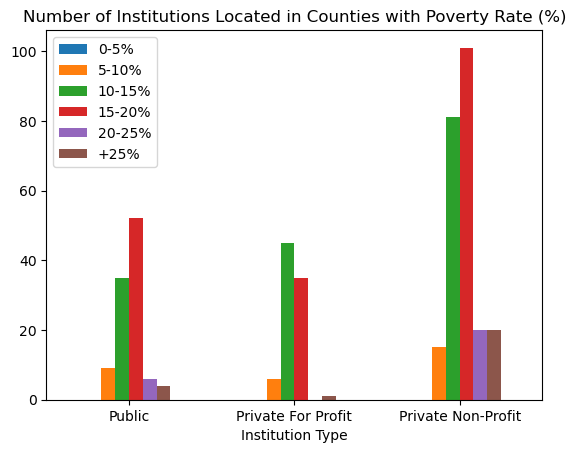

In [41]:
poverty_v_inst.plot(x="Institution Type", y=["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "+25%"],kind="bar", rot=0)
plt.title("Number of Institutions Located in Counties with Poverty Rate (%)")

plt.show()

In [62]:
poverty_type = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "+25%"]
type_pov = pd.DataFrame({"Poverty Type":poverty_type,
                         "Public" : public_pov_counts,
                         "Private For Profit": pvtprof_pov_counts,
                         "Private Non-Profit":pvtnon_pov_counts})
type_pov

,Poverty Type,Public,Private For Profit,Private Non-Profit
0,0-5%,0,0,0
1,5-10%,9,6,15
2,10-15%,35,45,81
3,15-20%,52,35,101
4,20-25%,6,0,10
5,+25%,4,1,20


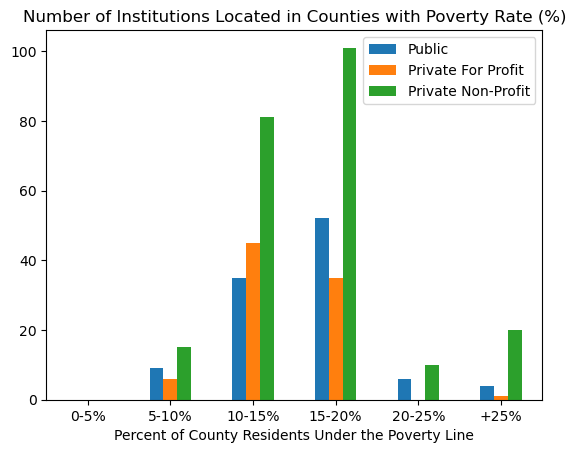

In [95]:
type_pov.plot(x="Poverty Type", y=["Public", "Private For Profit", "Private Non-Profit"],kind="bar", rot=0)
plt.title("Number of Institutions Located in Counties with Poverty Rate (%)")
plt.xlabel("Percent of County Residents Under the Poverty Line")
plt.show()

In [67]:
#Create a new variable of Poverty Type on origional dataframe
pov_cat = pov_inst.copy()
pov_cat["Poverty Type"] = ""
pov_cat

,Institution Name,Type,Poverty Rate,Poverty Type
0,Abilene Christian University,Private for Profit,14.582206,
1,Alvin Community College,Public,7.532447,
2,Amarillo College,Public,9.433295,
3,Amberton University,Private for Profit,13.982522,
4,Angelina College,Public,16.099911,
...,...,...,...,...
415,Strayer University-San Antonio,Private Non-Profit,15.172078,
416,Strayer University - Northwest Houston Campus,Private Non-Profit,15.772336,
417,Relay Graduate School of Education - Houston,Private for Profit,15.772336,
418,Relay Graduate School of Education - San Antonio,Private for Profit,15.172078,


In [70]:
#pd.cut a loop to assign the Poverty Type based on Poverty Rate
binsize = [0, 5, 10, 15, 20, 25, 30]
povlabel = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "+25%"]
pov_cat["Poverty Type"]=pd.cut(pov_cat["Poverty Rate"], binsize, labels=povlabel, include_lowest=False)
pov_cat

,Institution Name,Type,Poverty Rate,Poverty Type
0,Abilene Christian University,Private for Profit,14.582206,10-15%
1,Alvin Community College,Public,7.532447,5-10%
2,Amarillo College,Public,9.433295,5-10%
3,Amberton University,Private for Profit,13.982522,10-15%
4,Angelina College,Public,16.099911,15-20%
...,...,...,...,...
415,Strayer University-San Antonio,Private Non-Profit,15.172078,15-20%
416,Strayer University - Northwest Houston Campus,Private Non-Profit,15.772336,15-20%
417,Relay Graduate School of Education - Houston,Private for Profit,15.772336,15-20%
418,Relay Graduate School of Education - San Antonio,Private for Profit,15.172078,15-20%


In [73]:
crosstab = pd.crosstab(pov_cat["Type"],pov_cat["Poverty Type"])
crosstab

Poverty Type,5-10%,10-15%,15-20%,20-25%,+25%
Type,,,,,
Private Non-Profit,15,81,101,10,20
Private for Profit,6,45,35,0,1
Public,9,35,52,6,3


In [103]:
import researchpy as rp 
import scipy.stats as stats

stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=19.461503704762013, pvalue=0.012577137460369628, dof=8, expected_freq=array([[ 16.25298329,  87.22434368, 101.85202864,   8.66825776,
         13.00238663],
       [  6.22911695,  33.42959427,  39.03579952,   3.3221957 ,
          4.98329356],
       [  7.51789976,  40.34606205,  47.11217184,   4.00954654,
          6.01431981]]))

In [99]:
rp.summary_cat(pov_cat[["Type", "Poverty Type"]])


,Variable,Outcome,Count,Percent
0,Type,Private Non-Profit,227,54.05
1,,Public,106,25.24
2,,Private for Profit,87,20.71
3,Poverty Type,15-20%,188,44.87
4,,10-15%,161,38.42
5,,5-10%,30,7.16
6,,+25%,24,5.73
7,,20-25%,16,3.82
8,,0-5%,0,0.00


In [107]:
crosstab, test_results, expected = rp.crosstab(pov_cat["Type"], pov_cat["Poverty Type"], test="chi-square", expected_freqs=True, prop="cell")
print(f'----Proportion Table-----')
print(crosstab)
print(f'-----Expected Counts------')
print(expected)
print(f'-----Test Results-----')
print(test_results)

----Proportion Table-----
                   Poverty Type                                   
Poverty Type              5-10% 10-15% 15-20% 20-25%  +25%     All
Type                                                              
Private Non-Profit         3.58  19.33  24.11   2.39  4.77   54.18
Private for Profit         1.43  10.74   8.35   0.00  0.24   20.76
Public                     2.15   8.35  12.41   1.43  0.72   25.06
All                        7.16  38.42  44.87   3.82  5.73  100.00
-----Expected Counts------
                   Poverty Type                                            
Poverty Type              5-10%     10-15%      15-20%    20-25%       +25%
Type                                                                       
Private Non-Profit    16.252983  87.224344  101.852029  8.668258  13.002387
Private for Profit     6.229117  33.429594   39.035800  3.322196   4.983294
Public                 7.517900  40.346062   47.112172  4.009547   6.014320
-----Test Results-----

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 8.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


####INCOME DATA


In [76]:
income = renamed[["Type", "Median Income"]]
income

,Type,Median Income
0,Private for Profit,61806
1,Public,91972
2,Public,78038
3,Private for Profit,70732
4,Public,57055
...,...,...
415,Private Non-Profit,67275
416,Private Non-Profit,70789
417,Private for Profit,70789
418,Private for Profit,67275


In [77]:
income.describe()


,Median Income
count,420.000000
mean,69731.261905
std,12811.779954
min,47193.000000
25%,61911.000000
50%,70732.000000
75%,70789.000000
max,113255.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x17b004070>,
 'caps': [<matplotlib.lines.Line2D at 0x17b007f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x17b005120>],
 'medians': [<matplotlib.lines.Line2D at 0x17b004760>],
 'fliers': [<matplotlib.lines.Line2D at 0x17b005690>],
 'means': []}

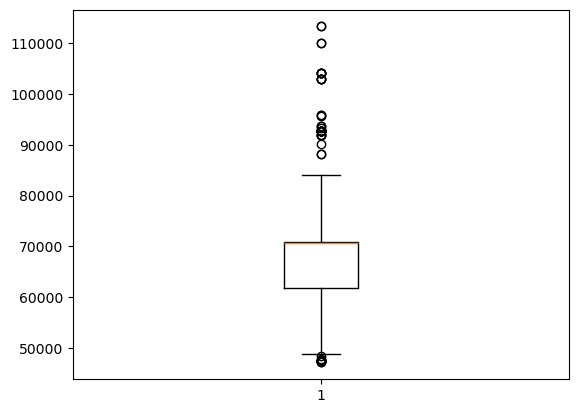

In [78]:
plt.boxplot(income["Median Income"])

In [80]:
income["Income Range"]=""
mbins = [45000, 60000, 75000, 90000,105000,120000]
mlabel = ["45k-60k", "60k-75k", "75k-90k", "90k-105k", "105k-120k"]
income["Income Range"]=pd.cut(income["Median Income"], mbins, labels=mlabel, include_lowest=False)
income


/var/folders/cd/nk_ykw0530jcdb_9538ml3mh0000gn/T/ipykernel_75308/1820330832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income["Income Range"]=""
/var/folders/cd/nk_ykw0530jcdb_9538ml3mh0000gn/T/ipykernel_75308/1820330832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income["Income Range"]=pd.cut(income["Median Income"], mbins, labels=mlabel, include_lowest=False)


,Type,Median Income,Income Range
0,Private for Profit,61806,60k-75k
1,Public,91972,90k-105k
2,Public,78038,75k-90k
3,Private for Profit,70732,60k-75k
4,Public,57055,45k-60k
...,...,...,...
415,Private Non-Profit,67275,60k-75k
416,Private Non-Profit,70789,60k-75k
417,Private for Profit,70789,60k-75k
418,Private for Profit,67275,60k-75k


In [84]:
pub_inc_0 = len(income.loc[(income["Type"]=="Public") & (income["Income Range"]=="45k-60k")])
pub_inc_5 = len(income.loc[(income["Type"]=="Public") & (income["Income Range"]=="60k-75k")])
pub_inc_10 = len(income.loc[(income["Type"]=="Public") & (income["Income Range"]=="75k-90k")])
pub_inc_15 = len(income.loc[(income["Type"]=="Public") & (income["Income Range"]=="90k-105k")])
pub_inc_20 = len(income.loc[(income["Type"]=="Public") & (income["Income Range"]=="105k-120k")])


public_inc_counts = [pub_inc_0, pub_inc_5, pub_inc_10, pub_inc_15, pub_inc_20]
print(public_inc_counts)

[39, 48, 9, 9, 1]


In [85]:
pvtprof_inc_0 = len(income.loc[(income["Type"]=="Private for Profit") & (income["Income Range"]=="45k-60k")])
pvtprof_inc_5 = len(income.loc[(income["Type"]=="Private for Profit") & (income["Income Range"]=="60k-75k")])
pvtprof_inc_10 = len(income.loc[(income["Type"]=="Private for Profit") & (income["Income Range"]=="75k-90k")])
pvtprof_inc_15 = len(income.loc[(income["Type"]=="Private for Profit") & (income["Income Range"]=="90k-105k")])
pvtprof_inc_20 = len(income.loc[(income["Type"]=="Private for Profit") & (income["Income Range"]=="105k-120k")])

pvtprof_inc_counts = [pvtprof_inc_0, pvtprof_inc_5, pvtprof_inc_10, pvtprof_inc_15, pvtprof_inc_20]
print(pvtprof_inc_counts)

[7, 58, 12, 9, 1]


In [86]:
pvtnon_inc_0 = len(income.loc[(income["Type"]=="Private Non-Profit") & (income["Income Range"]=="45k-60k")])
pvtnon_inc_5 = len(income.loc[(income["Type"]=="Private Non-Profit") & (income["Income Range"]=="60k-75k")])
pvtnon_inc_10 = len(income.loc[(income["Type"]=="Private Non-Profit") & (income["Income Range"]=="75k-90k")])
pvtnon_inc_15 = len(income.loc[(income["Type"]=="Private Non-Profit") & (income["Income Range"]=="90k-105k")])
pvtnon_inc_20 = len(income.loc[(income["Type"]=="Private Non-Profit") & (income["Income Range"]=="105k-120k")])

pvtnon_inc_counts = [pvtnon_inc_0, pvtnon_inc_5, pvtnon_inc_10, pvtnon_inc_15, pvtnon_inc_20]
print(pvtnon_inc_counts)

[48, 131, 18, 28, 2]


In [90]:
inctype = ["45k-60k", "60k-75k", "75k-90k", "90k-105k", "105k-120k"]
inc_inst = pd.DataFrame({"Income Range" : inctype,
                         "Public": public_inc_counts,
                         "Private for Profit": pvtprof_inc_counts,
                         "Private Non-Profit": pvtnon_inc_counts})
inc_inst

,Income Range,Public,Private for Profit,Private Non-Profit
0,45k-60k,39,7,48
1,60k-75k,48,58,131
2,75k-90k,9,12,18
3,90k-105k,9,9,28
4,105k-120k,1,1,2


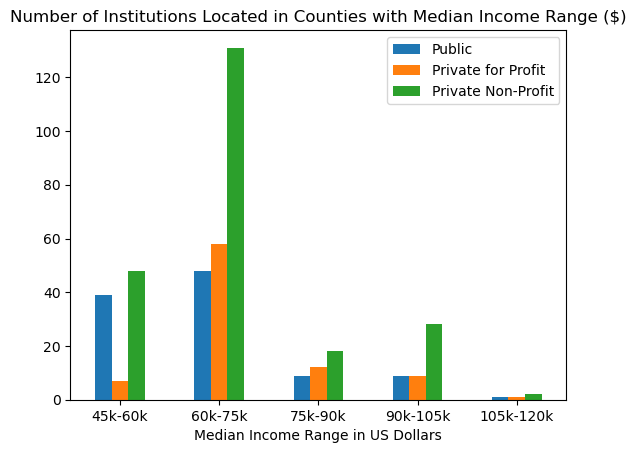

In [96]:
inc_inst.plot(x="Income Range", y=["Public", "Private for Profit", "Private Non-Profit"],kind="bar", rot=0)
plt.title("Number of Institutions Located in Counties with Median Income Range ($)")
plt.xlabel("Median Income Range in US Dollars")
plt.show()

In [93]:
crosstab2 = pd.crosstab(income["Type"],income["Income Range"])
crosstab2

Income Range,45k-60k,60k-75k,75k-90k,90k-105k,105k-120k
Type,,,,,
Private Non-Profit,48,131,18,28,2
Private for Profit,7,58,12,9,1
Public,39,48,9,9,1


In [94]:
stats.chi2_contingency(crosstab2)

Chi2ContingencyResult(statistic=25.479912460730326, pvalue=0.0012885126966094111, dof=8, expected_freq=array([[ 50.8047619 , 128.09285714,  21.07857143,  24.86190476,
          2.16190476],
       [ 19.47142857,  49.09285714,   8.07857143,   9.52857143,
          0.82857143],
       [ 23.72380952,  59.81428571,   9.84285714,  11.60952381,
          1.00952381]]))

In [109]:
crosstab, test_results, expected = rp.crosstab(income["Type"], income["Income Range"], test="chi-square", expected_freqs=True, prop="cell")
print(f'----Proportion Table-----')
print(crosstab)
print(f'-----Expected Counts------')
print(expected)
print(f'-----Test Results-----')
print(test_results)

----Proportion Table-----
                   Income Range                                           
Income Range            45k-60k 60k-75k 75k-90k 90k-105k 105k-120k     All
Type                                                                      
Private Non-Profit        11.43   31.19    4.29     6.67      0.48   54.05
Private for Profit         1.67   13.81    2.86     2.14      0.24   20.71
Public                     9.29   11.43    2.14     2.14      0.24   25.24
All                       22.38   56.43    9.29    10.95      0.95  100.00
-----Expected Counts------
                   Income Range                                            
Income Range            45k-60k     60k-75k    75k-90k   90k-105k 105k-120k
Type                                                                       
Private Non-Profit    50.804762  128.092857  21.078571  24.861905  2.161905
Private for Profit    19.471429   49.092857   8.078571   9.528571  0.828571
Public                23.723810   59.81428

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 8.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "
